# ML in Genomics 
## BiLSTM-3 Training with Sequence Plus Protein Profiles
### Team Members:
    1. Hrishikesh Mahajan
    2. Pratik Kamble
    3. Smridhi Bhat
    4. Yash Shekhadar


In [3]:
# Basic Imports
import gzip as gz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import pickle as pkl

# Keras Imports 
from keras.models import Sequential, load_model
from keras.layers import LSTM, Bidirectional
from keras.layers import Dense
from keras.layers import Masking
from keras.regularizers import l2
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Train.npy.gz", "r")
train_raw = np.load(f)
train_data = train_raw.reshape((len(train_raw), 700, 57))
r = np.r_[0:21,35:56]
train_x = train_data[:, :, r]
train_y = train_data[:, :, 22:30]

In [3]:
train_x.shape

(5365, 700, 42)

In [2]:
#Loading the testing data
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Test.npy.gz", "r")
test_raw = np.load(f)
test_data = test_raw.reshape((len(test_raw), 700, 57))
r = np.r_[0:21,35:56]
test_x = test_data[:, :, r]
test_y = test_data[:, :, 22:30]

In [5]:
model = Sequential()
# Masking to standardize input length
model.add(Masking(mask_value=0., input_shape=(700, 42)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',  'mae'])

In [6]:
# Adding checkpoint logic
filepath = '/content/drive/MyDrive/MLG/Model-8/Model-8.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [7]:
history = model.fit(train_x, train_y, epochs=40, validation_data = (test_x, test_y), batch_size=32,callbacks=[checkpoint])

Epoch 1/40
168/168 [==============================] - ETA: 0s - loss: 0.4073 - acc: 0.5175 - mae: 0.1516
Epoch 1: val_loss improved from inf to 0.26517, saving model to /content/drive/MyDrive/MLG/Model-8/Model-8.hdf5
168/168 [==============================] - 41s 140ms/step - loss: 0.4073 - acc: 0.5175 - mae: 0.1516 - val_loss: 0.2652 - val_acc: 0.5931 - val_mae: 0.1307
Epoch 2/40
168/168 [==============================] - ETA: 0s - loss: 0.3198 - acc: 0.6336 - mae: 0.1213
Epoch 2: val_loss improved from 0.26517 to 0.25042, saving model to /content/drive/MyDrive/MLG/Model-8/Model-8.hdf5
168/168 [==============================] - 18s 109ms/step - loss: 0.3198 - acc: 0.6336 - mae: 0.1213 - val_loss: 0.2504 - val_acc: 0.6160 - val_mae: 0.1281
Epoch 3/40
168/168 [==============================] - ETA: 0s - loss: 0.3023 - acc: 0.6535 - mae: 0.1155
Epoch 3: val_loss improved from 0.25042 to 0.23913, saving model to /content/drive/MyDrive/MLG/Model-8/Model-8.hdf5
168/168 [====================

In [4]:
model = load_model("/content/drive/MyDrive/MLG/Model-8/Model-8.hdf5")

In [5]:
test_pred = model.predict(np.array([test_x[0]]))

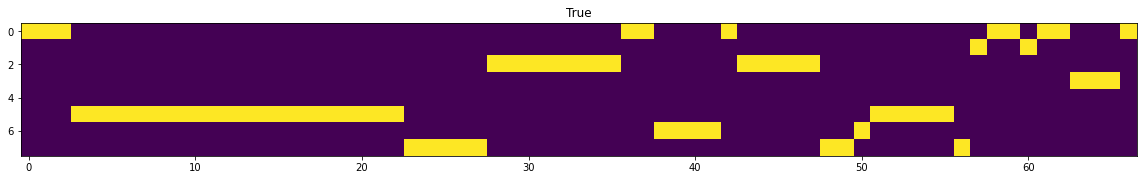

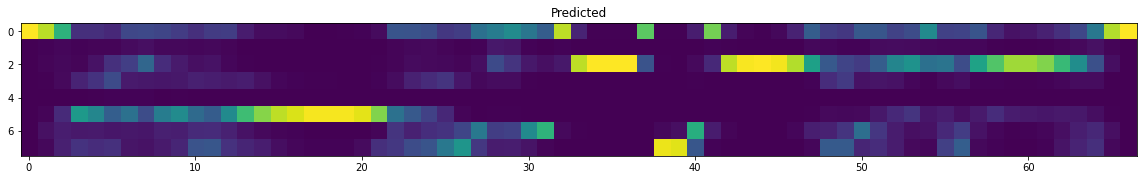

In [6]:
# Checking for a single prediction
plt.figure(figsize=(20,4))
plt.title("True")
plt.imshow(test_y[0][0:67].T)
plt.figure(figsize=(20,4))
plt.title("Predicted")
plt.imshow(test_pred[0][0:67].T)